# Preguntas del enunciado

$C_{ij} = 
\begin{cases}
    -n_{ij} \hspace{1.4cm} i \neq j\\
    2 + n_{i} \hspace{1cm} i = j
\end{cases}
$

## 1. ¿Qué tipo de matriz resulta C?

La matriz de Colley resulta: 
1. **simétrica** [[1]](#1)  
    $C_{ij} = C_{ji}$ ya que la cantidad de partidos jugados entre $i,j$ es la misma que $j,i$. Luego $C = C^{t}$


2. **diagonal dominante**  
    Por definición la matriz tiene en la diagonal los partidos jugados por el equipo $i$ ($n_i$) y en el resto los partidos jugados entre los equipos $i$, $j$ ($n_{ij}$).  
    Trivialmente pordemos ver que $n_{ij} \leq n_i$ ya que $\sum_{j \neq i}n_{ij} = n_i$  
    Luego $|C_{ii}| \geq \sum_{j \neq i}|C_{ji}| \ \ \forall i, j $

## 2. ¿Cómo se garantiza la aplicabilidad de EG sin intercambio de filas o columnas?

La matriz de Colley es una **matriz diagonal dominante**, luego según podemos ver en [[2]](#2) una propiedad de estas matrices es que no necesitan permutaciones para aplicar EG. **TODO: explicar esto mejor y (quizás) buscar una fuente que no sea wikipedia**

## 3. ¿Qué se puede decir sobre la estabilidad de los cálculos?

Que pueden llegar a ser muy inestables, debido a la aritmética finita de la computadora[3].
**TODO: PONER EJEMPLO DE CUANDO PASA**

## justificación de por qué funciona correctamente EG
Además, sabemos que existen casos donde el algoritmo EG no puede encontrar una
solución. Se debe incluir en el desarrollo una justificación sobre por qué el algoritmo
funciona correctamente en el caso del método CMM.

## Referencias
<a id="1">[1]</a> 
**Colley’s Bias Free College Football Ranking Method**, Wesley N. Colley (2002) Princeton University.

<a id="2">[2]</a> 
**<a href="https://en.wikipedia.org/wiki/Diagonally_dominant_matrix#Applications_and_properties">Wikipedia, Diagonally dominant Matrix</a>**

<a id="3">[3]</a> 
**<a href="https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html">What Every Computer Scientist Should Know About Floating-Point Arithmetic</a>** David Goldberg (1991)

# Experimentación

In [48]:
import os
from fnmatch import fnmatch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
def listfiles(root, pattern):
    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern):
                yield os.path.join(path, name)

In [40]:
dataDirectory = "../data/"
testsDirectory = "tests/"
testsCompletosDiretory = "tests/test_completos/"

**test1** 
mean:2.118263250083796e-07, median:1.5634059999380945e-07, var:1.3703456580891367e-14

diferencias (1ras 5)
 [[3.2279778e-07]
 [1.7449570e-07]
 [1.0838318e-07]
 [1.1018753e-07]
 [1.3818550e-07]]


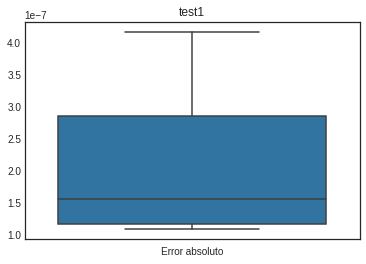

**test2** 
mean:2.599754333569108e-07, median:2.75063514992846e-07, var:1.2024715958479739e-14

diferencias (1ras 5)
 [[3.2995415e-07]
 [4.1978073e-07]
 [2.4007416e-07]
 [3.1005287e-07]
 [1.8009567e-07]]


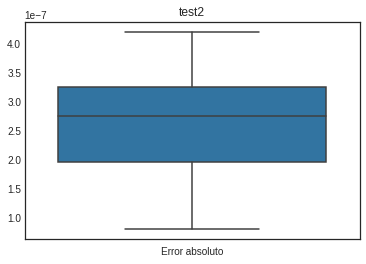

**test-prob-2** 
mean:1.7064062834970528e-07, median:1.3310146501632758e-07, var:1.6545625402116708e-14

diferencias (1ras 5)
 [[3.35700990e-07]
 [3.48636630e-07]
 [5.21240200e-08]
 [1.57007220e-07]
 [2.11792001e-08]]


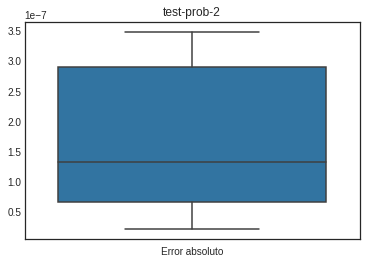

**test-prob-1** 
mean:3.3128293328947106e-07, median:3.084545149578677e-07, var:8.672803244347767e-15

diferencias (1ras 5)
 [[4.7758293e-07]
 [2.2181511e-07]
 [2.7203369e-07]
 [3.4487534e-07]
 [4.2205429e-07]]


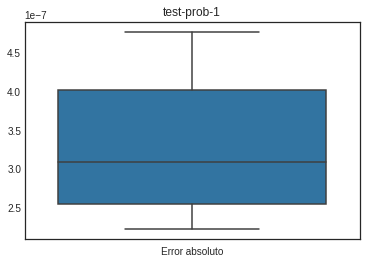

**test_completo_1000_2** 
mean:2.137821759678027e-05, median:1.1807379460049283e-05, var:5.101689303415971e-08

diferencias (1ras 5)
 [[3.21762583e-03]
 [1.42627987e-05]
 [9.18126631e-06]
 [1.22872447e-05]
 [1.42535214e-05]]


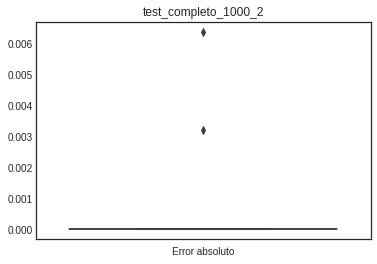

**test_completo_100_4** 
mean:0.0011523573354296974, median:0.00024142266194998596, var:4.147488442840873e-05

diferencias (1ras 5)
 [[0.05061235]
 [0.00013391]
 [0.00023582]
 [0.00013781]
 [0.00055581]]


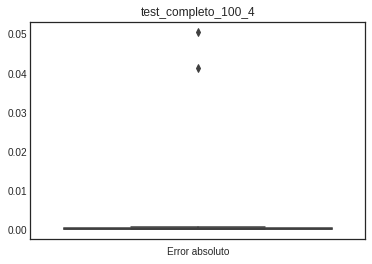

**test_completo_100_8** 
mean:0.0028381742101514108, median:0.0006044158999350124, var:0.00023882073883625652

diferencias (1ras 5)
 [[1.02622476e-01]
 [1.28147129e-04]
 [8.39334283e-05]
 [1.08838549e-04]
 [9.96424046e-04]]


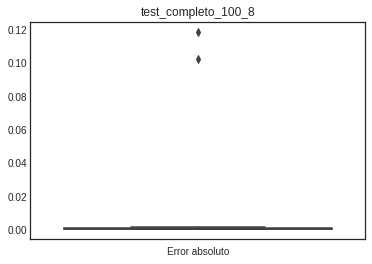

**test_completo_10_1** 
mean:0.05833333115861996, median:0.016666665963614963, var:0.007833333779322105

diferencias (1ras 5)
 [[0.15833333]
 [0.01666666]
 [0.01666699]
 [0.01666634]
 [0.01666667]]


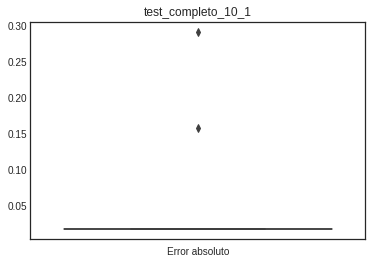

**test_completo_1000_8** 
mean:9.115774836087958e-05, median:7.553140970500971e-05, var:1.538871546451828e-07

diferencias (1ras 5)
 [[1.18879540e-02]
 [6.78671862e-05]
 [7.80191952e-05]
 [7.46491043e-05]
 [8.14665945e-05]]


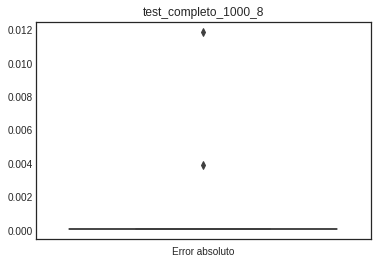

In [74]:
for path in [dataDirectory, testsDirectory]:
    for filename in listfiles(path, "*.in"):
        expected = pd.read_table(filename.replace(".in", ".expected"), names = ["expected"])
        output = pd.read_table(filename.replace(".in", ".out"), names = ["output"])
        
        data = pd.concat([expected, output], axis=1)
        dif = np.absolute(np.array(expected) - np.array(output))
        
        testname = filename.split("/")[-1].replace(".in", "")
        
        print(f"**{testname}** \nmean:{dif.mean()}, median:{np.median(dif)}, var:{dif.var()}")
        print("\ndiferencias (1ras 5)\n", dif[:5])
        
        sns.boxplot(y=dif)
        plt.title(testname)
        plt.xlabel("Error absoluto")
        plt.show()
        